<a href="https://colab.research.google.com/github/hachristina/food-sales-prediction/blob/main/Food_Sales_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Part 1: Set up 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('/content/drive/MyDrive/Data Science Bootcamp/Project 1: Food Sales Prediction/sales_predictions.csv')

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#Part 2: Cleaning

For Part 2, your task is to  use Pandas to start cleaning and exploring the data. As data scientists, about 80% of our time is spent on data preparation - so this is a very important step! First, clone the GitHub repo you created to house your project so you are able to commit your work to this repository. See the video at the end of this assignment if you are unsure of how to do this.

Your data should already be loaded into your notebook from part 1 of the project.
Explore the data - what do you need to do to clean this data? Clean it!  
Be sure to address each of the following 8 tasks

In [3]:
#1) How many rows and columns?
df.shape

(8523, 12)

In [4]:
#2) What are the datatypes of each variable?
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
#3) Are there duplicates? If so, drop any duplicates.
df.duplicated().any()

False

In [6]:
#4) Identify missing values.
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
#5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).
#missing values in Item_Weight and Outlet_size

#MISSING ITEM_WEIGHT
null_item_weight = pd.isnull(df['Item_Weight'])
null_item_weight_filter = df.loc[null_item_weight]
null_item_weight_filter

year_filter = df["Outlet_Establishment_Year"] == 1985
df[year_filter].describe()
#the Item_Weight values are missing when Outlet_Establishment_Year == 1985 (1463 total missing weight values)

df['Item_Identifier'].value_counts()

#sorting the dataframe by Item Identifier and Outlet Establishment Year so we can grab the missing item weights from the nearby rows
df.sort_values(by=['Item_Identifier', 'Outlet_Establishment_Year'], ascending=False, inplace=True)
df.head(50)

#filling in the missing values with the nearby row
df.loc[:, 'Item_Weight'].fillna(method='ffill', inplace=True)


#MISSING OUTLET SIZES

df.loc[:, 'Outlet_Identifier'].value_counts()
#OUT027 - Medium - Tier 3 - Supermarket Type 3
#OUT013 - Large - Tier 3 - Supermarket Type 1
#OUT049 - Medium - Tier 1 - Supermarket Type 1
#OUT046 - Small - Tier I - Supermarket Type1
#OUT035 - Small - Tier 2 - Supermarket Type1
#OUT045 - NaN - Tier 2 - Supermarket Type 1
#OUT018 - Medium - Tier 3 - Supermarket Type2
#OUT017 - NaN  - Tier 2 - Supermarket Type 1
#OUT010 - NaN - Tier 3 - Grocery Store
#OUT019 - Small - Tier 1 - Grocery Store


outlet_location_filter1 = df["Outlet_Location_Type"] == "Tier 1"
outlet_location_filter2 = df["Outlet_Location_Type"] == "Tier 2"
outlet_location_filter3 = df["Outlet_Location_Type"] == "Tier 3"


outlet_type_filter1 = df["Outlet_Type"] == "Supermarket Type1"
outlet_type_filter2 = df["Outlet_Type"] == "Supermarket Type2"
outlet_type_filter3 = df["Outlet_Type"] == "Supermarket Type3"
outlet_type_filter4 = df["Outlet_Type"] == "Grocery Store"



#Missing Outlet_Size for OUT045 and OUT017
#turning these missing values into "Small" because the other Tier 2, Supermarket Type1 store is small. 

df.loc[outlet_location_filter2 & outlet_type_filter1 & (df['Outlet_Size'].isna()), 'Outlet_Size'] = 'Small'
df[df['Outlet_Identifier'] == "OUT045"]

#Missing Outlet_Size for OUT010
#turning these missing values into "Medium" because the other Tier 3 stores are Medium
df.loc[outlet_location_filter3 & outlet_type_filter4 & (df['Outlet_Size'].isna()), 'Outlet_Size'] = 'Medium'
df[df['Outlet_Identifier'] == "OUT010"]


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
214,NCZ54,14.650,Low Fat,0.000000,Household,161.5552,OUT010,1998,Medium,Tier 3,Grocery Store,324.9104
4924,NCZ53,9.600,Low Fat,0.040970,Health and Hygiene,188.7214,OUT010,1998,Medium,Tier 3,Grocery Store,376.8428
411,NCZ42,10.500,Low Fat,0.000000,Household,238.3248,OUT010,1998,Medium,Tier 3,Grocery Store,711.0744
1224,NCZ30,6.590,Low Fat,0.043828,Household,121.4098,OUT010,1998,Medium,Tier 3,Grocery Store,241.0196
8054,NCZ29,15.000,Low Fat,0.119461,Health and Hygiene,126.3362,OUT010,1998,Medium,Tier 3,Grocery Store,503.3448
...,...,...,...,...,...,...,...,...,...,...,...,...
8063,DRB25,12.300,Low Fat,0.116261,Soft Drinks,107.0938,OUT010,1998,Medium,Tier 3,Grocery Store,214.3876
2479,DRB13,6.115,Regular,0.011791,Soft Drinks,189.0530,OUT010,1998,Medium,Tier 3,Grocery Store,948.7650
8371,DRA59,8.270,Regular,0.214125,Soft Drinks,183.9924,OUT010,1998,Medium,Tier 3,Grocery Store,185.0924
4130,DRA24,19.350,Regular,0.066832,Soft Drinks,163.8868,OUT010,1998,Medium,Tier 3,Grocery Store,327.5736


In [8]:
#6) Confirm that there are no missing values after addressing them.
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [9]:
#7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

#Check to see the value counts
df.loc[:, 'Item_Fat_Content'].value_counts()

#Make changes to keep consistency
df.loc[df['Item_Fat_Content'] == 'LF', 'Item_Fat_Content'] = 'Low Fat'
df.loc[df['Item_Fat_Content'] == 'low fat', 'Item_Fat_Content'] = 'Low Fat'
df.loc[df['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = 'Regular'
df.loc[:, 'Item_Fat_Content'].value_counts()

#Check value counts -- the below features are consistent
df.loc[:, 'Item_Type'].value_counts()
df.loc[:, 'Outlet_Identifier'].value_counts()
df.loc[:, 'Outlet_Establishment_Year'].value_counts()
df.loc[:, 'Outlet_Size'].value_counts()
df.loc[:, 'Outlet_Location_Type'].value_counts()
df.loc[:, 'Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [10]:
#8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

df[["Item_Weight", "Item_Visibility", "Item_MRP", "Outlet_Establishment_Year", "Item_Outlet_Sales"]].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.873262,0.066132,140.992782,1997.831867,2181.288914
std,4.646486,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#Part 3: Statistical Analysis

For Part3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

1. Histogram to view the distributions of various features in your dataset.
2. Boxplot to view statistical summaries of various features in your dataset.
3. Heatmap of the correlation between features.

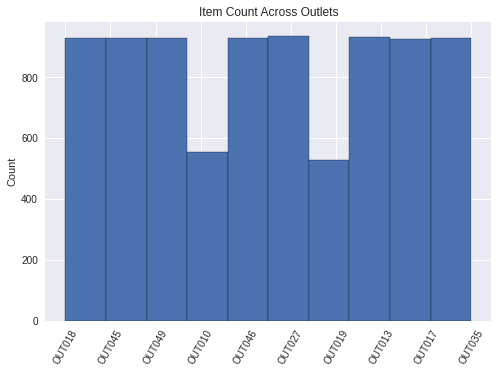

In [11]:
#1. Histogram to view the distributions of various feature in your dataset

#Viewing distribution of quantity of items carried across individual outlets
plt.style.use('seaborn')
df['Outlet_Identifier'].hist(bins=10, edgecolor = "black")
plt.xticks(rotation = 60)
plt.title("Item Count Across Outlets")
plt.ylabel('Count');

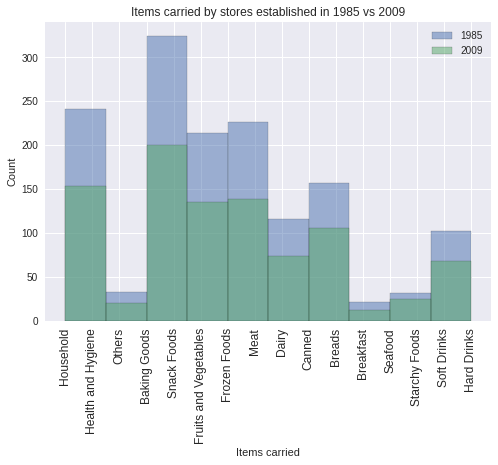

In [12]:
#Comparing distributions of item types in stores established in 1985 and 2009
year1985_filter = df["Outlet_Establishment_Year"] == 1985
year2009_filter = df["Outlet_Establishment_Year"] == 2009

plt.hist(df[year1985_filter]['Item_Type'], alpha=0.5, edgecolor="black", label="1985")
plt.hist(df[year2009_filter]['Item_Type'], alpha=0.5, edgecolor="black", label="2009")
plt.title('Items carried by stores established in 1985 vs 2009')
plt.xlabel('Items carried')
plt.ylabel('Count')
plt.legend()
plt.xticks(fontsize=12, rotation = 90);

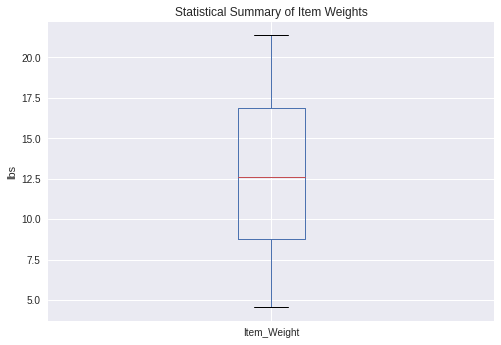

In [13]:
#2. Boxplot to view statistical summaries of various features in your dataset.
#Viewing boxplot of weight of items in the dataset
df.boxplot(['Item_Weight'])
plt.title('Statistical Summary of Item Weights')
plt.ylabel('lbs');

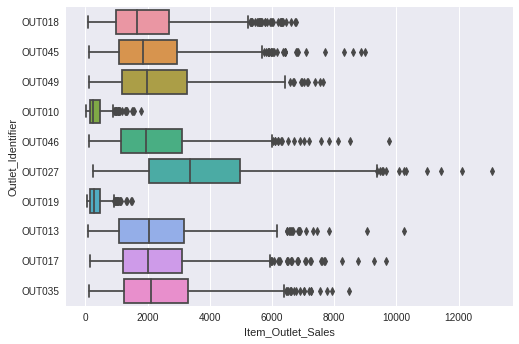

In [14]:
#Viewing statistical summaries of item outlet sales by inidividual outlets

sns.boxplot(x=df["Item_Outlet_Sales"], y=df["Outlet_Identifier"]);

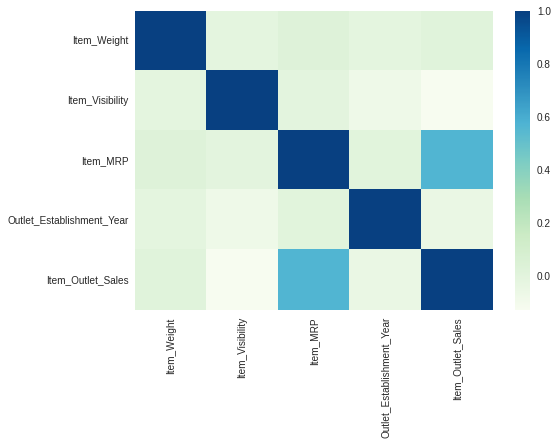

In [15]:
#3. Heatmap of the correlation between features

corr = df.corr()

sns.heatmap(corr, cmap="GnBu");

#Part 4: Explanatory Data Analysis

1. Present which Item Type yieldest the highest/lowest sales at a particular store

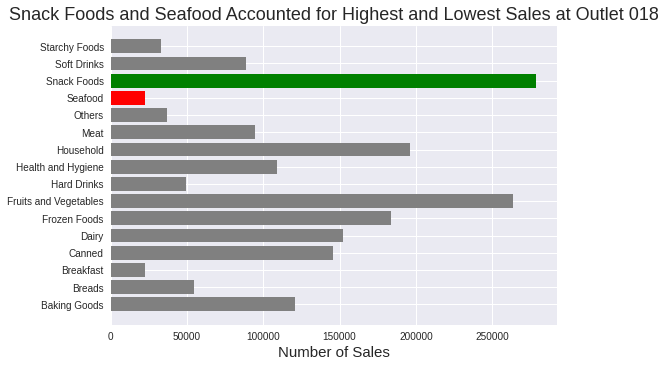

In [16]:
#Filtering data for just Outlet 018
outlet_018_filter = df['Outlet_Identifier'] == 'OUT018'
out018_df = df[outlet_018_filter]

#Grouping the data by Item Type and getting the sum of each column to grab total sum of the Item_Outlet_Sales
item_sales_df = out018_df.groupby('Item_Type').sum()

#Creating a bar chart of Outlet 018's sales, organized by Item Type, to see which Item Type had the highest/lowest sales at this particular store
plt.barh(item_sales_df.index, item_sales_df['Item_Outlet_Sales'], 
         color = ["gray", "gray", "gray", "gray", "gray", "gray", "gray", "gray", "gray", "gray", "gray", "gray", "red", "green", "gray", "gray"])
plt.title("Snack Foods and Seafood Accounted for Highest and Lowest Sales at Outlet 018", size = 18)
plt.xlabel("Number of Sales", size=15);

2. Present which of the medium sized stores yielded the highest item sales

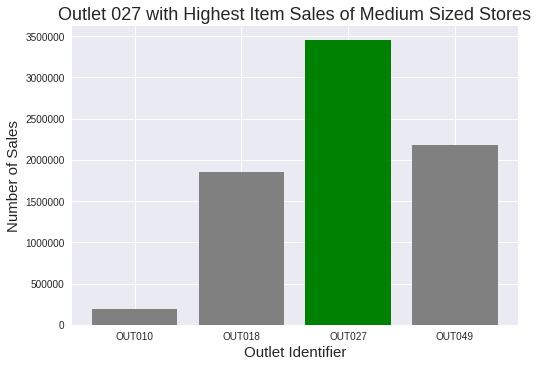

In [17]:
#Filtering data for just Medium outlets
med_outlet_filter = df['Outlet_Size'] == 'Medium'
med_outlet_df = df[med_outlet_filter]

#Grouping the data by Outlet Identifier and getting the sum of each column to grab total sum of the Item_Outlet_Sales
group_med_outlet_df = med_outlet_df.groupby('Outlet_Identifier').sum()

#Creating a bar chart of the outlets' sales to see which medium sized store yielded the highest/lowest sales
plt.bar(group_med_outlet_df.index, group_med_outlet_df['Item_Outlet_Sales'],
        color=["gray", "gray", "green", "gray"])
plt.title("Outlet 027 with Highest Item Sales of Medium Sized Stores", size = 18)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) #grabbed from Brenda's suggestion on Discord
plt.xlabel("Outlet Identifier", size=15)
plt.ylabel("Number of Sales", size=15);

# Part 5: Linear Regression

In [18]:
#Using Linear Regression to create and evaluate a model to predict sales
# Transforming categorical variables into numbers and using dummy encoding where appropriate
# view unique categories
df['Outlet_Size'].unique()

# define dictionary to replace
OutletSize = {"Small": 0, "Medium": 1, "High": 3}

#use the dictionary
df['Outlet_Size'] = df['Outlet_Size'].replace(OutletSize)

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7738,NCZ54,14.65,Low Fat,0.083699,Household,163.4552,OUT018,2009,1,Tier 3,Supermarket Type2,2599.2832
1969,NCZ54,14.65,Low Fat,0.083528,Household,162.4552,OUT045,2002,0,Tier 2,Supermarket Type1,2274.3728
7926,NCZ54,14.65,Low Fat,0.083489,Household,161.3552,OUT049,1999,1,Tier 1,Supermarket Type1,7148.0288
214,NCZ54,14.65,Low Fat,0.000000,Household,161.5552,OUT010,1998,1,Tier 3,Grocery Store,324.9104
2839,NCZ54,14.65,Low Fat,0.083359,Household,161.9552,OUT046,1997,0,Tier 1,Supermarket Type1,4711.2008


In [19]:
# view unique categories
df['Outlet_Location_Type'].unique()

# define dictionary to replace
OutletLocationType = {"Tier 1": 1, "Tier 2": 2, "Tier 3": 3}

#use the dictionary
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].replace(OutletLocationType)

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7738,NCZ54,14.65,Low Fat,0.083699,Household,163.4552,OUT018,2009,1,3,Supermarket Type2,2599.2832
1969,NCZ54,14.65,Low Fat,0.083528,Household,162.4552,OUT045,2002,0,2,Supermarket Type1,2274.3728
7926,NCZ54,14.65,Low Fat,0.083489,Household,161.3552,OUT049,1999,1,1,Supermarket Type1,7148.0288
214,NCZ54,14.65,Low Fat,0.000000,Household,161.5552,OUT010,1998,1,3,Grocery Store,324.9104
2839,NCZ54,14.65,Low Fat,0.083359,Household,161.9552,OUT046,1997,0,1,Supermarket Type1,4711.2008


In [20]:
# Transforming categorical variables into numbers and using dummy encoding where appropriate
#determined this is nominal so will use OHE

df = pd.get_dummies(df, columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], drop_first=True)
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7738,NCZ54,14.65,0.083699,163.4552,2009,1,3,2599.2832,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1969,NCZ54,14.65,0.083528,162.4552,2002,0,2,2274.3728,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
7926,NCZ54,14.65,0.083489,161.3552,1999,1,1,7148.0288,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
214,NCZ54,14.65,0.000000,161.5552,1998,1,3,324.9104,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2839,NCZ54,14.65,0.083359,161.9552,1997,0,1,4711.2008,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [21]:
len(df['Item_Identifier'].unique())
#The identifiers are also nominal, but because there are 1559 unique item identifiers, it wouldn't be appropriate to use OHE

#trying to use hashing

unique_identifiers = np.unique(df[['Item_Identifier']])
#print("Total item identifiers:", len(unique_identifiers))
#print(unique_identifiers)

from sklearn.feature_extraction import FeatureHasher

fh = FeatureHasher(n_features=10, input_type='string')
hashed_features = fh.fit_transform(df['Item_Identifier'])
hashed_features = hashed_features.toarray()
# print(hashed_features)
new_df = pd.concat([df, pd.DataFrame(hashed_features)], axis=1)
new_df.head()

new_df.rename(columns={0: "ItemID1", 1:"ItemID2", 2:"ItemID3", 3:"ItemID4", 4:"ItemID5", 5:"ItemID6", 6:"ItemID7", 7:"ItemID8", 8:"ItemID9", 9:"ItemID10"}, inplace=True)
new_df.drop(columns="Item_Identifier", inplace=True)
new_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,ItemID1,ItemID2,ItemID3,ItemID4,ItemID5,ItemID6,ItemID7,ItemID8,ItemID9,ItemID10
0,9.30,0.016047,249.8092,1999,1,1,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
1,5.92,0.019278,48.2692,2009,1,3,443.4228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
2,17.50,0.016760,141.6180,1999,1,1,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
3,19.20,0.000000,182.0950,1998,1,3,732.3800,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
4,8.93,0.000000,53.8614,1987,3,3,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0


Assign the "Item_Outlet_Sales" column as the target and the rest of the variables as the features matrix

In [22]:
y = new_df['Item_Outlet_Sales']
X = new_df.drop(columns = 'Item_Outlet_Sales')


y.shape
X.shape

(8523, 44)

Train test split the data set

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Build a linear regression model

In [24]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Evaluate the test set results using R2

In [25]:
print("R2 Train Score:", r2_score(y_train, reg_model.predict(X_train)))
print("R2 Test Score:", r2_score(y_test, reg_model.predict(X_test)))

R2 Train Score: 0.5622383373007961
R2 Test Score: 0.5663209914828912


Evaluate the test set results using RMSE

In [26]:
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, reg_model.predict(X_test))))

Testing RMSE: 1093.8512397475317


#Part 6: Tree Based Models

Your task is to build tree based models to predict sales and compare evaluation metrics for regression problems.  



1.   Build and evaluate a simple decision tree model.
2.   Build and evaluate a bagged tree model.
3.   Build and evaluate a random forest model. 

In [27]:
#1 Build and evaluate a simple decision tree model

#Assign target vector and features matrix

y = new_df['Item_Outlet_Sales']
X = new_df.drop(columns = 'Item_Outlet_Sales')

In [28]:
#Train test split (model validation)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [29]:
#Run a regression tree model with default parameters

dec_tree = DecisionTreeRegressor(random_state = 42)

In [30]:
#Fit the model using the training data. The model is learning the relationship between the features (X) and the target (y)

dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [31]:
#Predict the target values for the training set and the test set

train_pred = dec_tree.predict(X_train)
test_pred = dec_tree.predict(X_test)

In [32]:
#look at options for tuning the model and determine the depth of the default tree and the number of leaf nodes
dec_tree
print('Depth of the default tree:', dec_tree.get_depth())
print('Number of leaf nodes:', dec_tree.get_n_leaves())

Depth of the default tree: 40
Number of leaf nodes: 6252


In [33]:
#Evaluate the model, show the R2 score
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print('train_score:', train_score)
print('test_score:', test_score)

train_score: 1.0
test_score: 0.17772741361312094


In [34]:
#Optimize the max_depth based on the R2 score

max_depth_range = list(range(2, 36)) # will try every value between 2 and 36
#List to store the score for each value of max_depth:

r2 = []

for depth in max_depth_range:
  dec_tree = DecisionTreeRegressor(max_depth = depth, random_state=42)
  dec_tree.fit(X_train, y_train)
  score = dec_tree.score(X_test, y_test)
  r2.append(score)

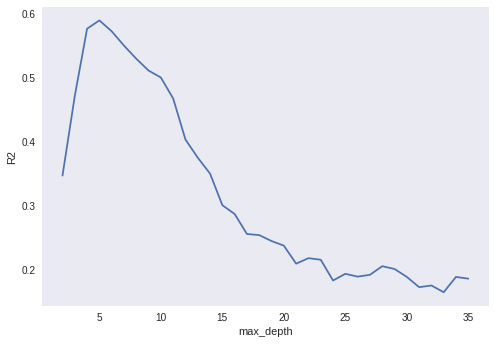

In [35]:
#Visualize which max_depth leads to the highest r2 score

plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2')
plt.grid(axis='both');

#It appears that the best score for the model is when the parameter max_depth = 6

In [36]:
#check scores with max_depth = 6
dec_tree_6 = DecisionTreeRegressor(max_depth = 6, random_state = 42)
dec_tree_6.fit(X_train, y_train)
train_6_score = dec_tree_6.score(X_train, y_train)
test_6_score = dec_tree_6.score(X_test, y_test)
print('train_6_score:', train_6_score)
print('test_6_score:', test_6_score)

train_6_score: 0.6261464968318194
test_6_score: 0.5719726501608647


In [37]:
#2 Build and evaluate a bagged tree model.

#Make an instance of the model using default parameters

bagreg = BaggingRegressor(random_state = 42)
bagreg

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [38]:
#train the model on the data, storing the information learned from the data. 
#the model is learning the relationship between X and y
bagreg.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [39]:
# predict the values for y

bagreg.predict(X_test)

array([1087.18482,  998.30052,  639.56748, ..., 4667.65748, 1804.91722,
       2905.68436])

In [40]:
# evaluate model performance

bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)
print('bagreg_train_score:', bagreg_train_score)
print('bagreg_test_score:', bagreg_test_score)

bagreg_train_score: 0.9178081436516641
bagreg_test_score: 0.5520645726362016


In [41]:
#Build and evaluate a random forest model.

#Random Forest regressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [42]:
# Training R2

print('rf_train_score:', rf.score(X_train, y_train))
print('rf_test_score:', rf.score(X_test, y_test))

rf_train_score: 0.9394771522492804
rf_test_score: 0.5741797785820487


You now have tried at least 4 models on this data set (including the regression model from last week).
1.   Compare the performance of your models based on r^2.
2.   Compare the performance of your models based on rmse.  
3.   Overall, which model do you recommend?

1. Compare the performance of the models based on r^2

Regression Model: 
R2 Train Score: 0.5622383373007961
R2 Test Score: 0.5663209914828913

Decision Tree Model: 
R2 Train Score: 1.0
R2 Test Score: 0.17772741361312094

Bagged Tree Model:
R2 Train Score: 0.9178081436516641
R2 Test Score: 0.5520645726362016

Random Forest Model:
R2 Train Score: 0.9387189921120709
R2 Test Score: 0.5794777539327004

2. Compare the performance of the models based on rmse

In [43]:
rmse_regmodel = np.sqrt(mean_squared_error(y_test, reg_model.predict(X_test)))
rmse_decmodel = np.sqrt(mean_squared_error(y_test, dec_tree.predict(X_test)))
rmse_bagregmodel = np.sqrt(mean_squared_error(y_test, bagreg.predict(X_test)))
rmse_rfmodel = np.sqrt(mean_squared_error(y_test, rf.predict(X_test)))

print('Regression Model RMSE:', rmse_regmodel)
print('Decision Tree Model RMSE:', rmse_decmodel)
print('Bagged Tree Model RMSE:', rmse_bagregmodel)
print('Random Forest Model RMSE:', rmse_rfmodel)

Regression Model RMSE: 1093.8512397475317
Decision Tree Model RMSE: 1499.1146529426574
Bagged Tree Model RMSE: 1111.6850590435618
Random Forest Model RMSE: 1083.8949762688858


3. Overall, which model do you recommend?

For this data, I would recommend using the Random Forest model because it has the lowest RMSE and highest R2 Test scores.